In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
SAMPLES_DIR = './samples/With_FPS/'
TRIAL_DIRS = {
    'pcvr':'PCVR-FPS-ConfThresh_0/', 
    'battery':'Standalone-Battery-FPS-ConfThresh_0/', 
    'powered':'Standalone-Powered-FPS-ConfThresh_0/', 
}
FPS_FILES = {
    'control':'FPS_Control.csv',
    'control-rand':'FPS_Control-Rand.csv',
    'min':'FPS_Min.csv',
    'max':'FPS_Max.csv',
    'max-rand':'FPS_Max-Rand.csv'
}
EYE_FILES = {
    'control':'Left_Eye_Control.csv', 
    'control-rand':'Left_Eye_Control-Rand.csv',
    'min':'Left_Eye_Min.csv', 
    'max':'Left_Eye_Max.csv', 
    'max-rand':'Left_Eye_Max-Rand.csv'
}

def get_eye_filepath(trial_key, eye_key):
    return os.path.join(SAMPLES_DIR, TRIAL_DIRS[trial_key], EYE_FILES[eye_key])
def get_fps_filepath(trial_key, eye_key):
    return os.path.join(SAMPLES_DIR, TRIAL_DIRS[trial_key], FPS_FILES[eye_key])

def read_trial(filepath:str, sec_from_end:float, sec_duration:float):
    # Read CSV
    df = pd.read_csv(filepath)
    
    # Get more sensible timestamps
    s = df['unix_ms'].iloc[0]
    f = df['frame'].iloc[0]
    df['trial_ms'] = df['unix_ms'] - s
    df['trial_sec'] = df['trial_ms'] / 1000
    df['trial_frame'] = df['frame'] - f
    
    # Filter by seconds from the end (sec) and and duration (sec). Then re-center the trial_ms and trial_sec
    end_timestamp = df['trial_sec'].iloc[-1] - sec_from_end
    df2 = df[df['trial_sec'].between(end_timestamp - sec_duration, end_timestamp)]
    s2 = df2['trial_ms'].iloc[0]
    s3 = df2['trial_sec'].iloc[0]
    f2 = df2['trial_frame'].iloc[0]
    df2['trial_ms2'] = df2['trial_ms'] - s2
    df2['trial_sec2'] = df2['trial_sec'] - s3
    df2['trial_frame2'] = df2['trial_frame'] - f2
    df3 = df2.drop(columns=['id','frame','unix_ms','trial_ms','trial_sec','trial_frame'])
    df4 = df3.rename(columns={'trial_ms2':'trial_ms', 'trial_sec2':'trial_sec', 'trial_frame2':'trial_frame'})
    
    # Sample Rate interpretation
    df4['sample_count'] = range(0, len(df4))
    
    # Diff Interpretation
    df4['rotation_x_diff'] = df4['rotation_x'].diff().fillna(0)
    df4['rotation_y_diff'] = df4['rotation_y'].diff().fillna(0)
    df4['rotation_z_diff'] = df4['rotation_z'].diff().fillna(0)
    df4['trial_frame_diff'] = df4['trial_frame'].diff().fillna(0)
    
    # Return results
    return df4

In [22]:
df = read_trial(get_eye_filepath('pcvr','control'), 10, 40)
df_nonzero = df[df['rotation_x_diff'] != 0.0]
sample_rate = len(df_nonzero)/40
sample_rate

C:\Users\Ryan Kim\AppData\Local\Temp\ipykernel_47684\1335613575.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['trial_ms2'] = df2['trial_ms'] - s2
C:\Users\Ryan Kim\AppData\Local\Temp\ipykernel_47684\1335613575.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['trial_sec2'] = df2['trial_sec'] - s3
C:\Users\Ryan Kim\AppData\Local\Temp\ipykernel_47684\1335613575.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

88.55

In [26]:
frame_duration_sec = 90/len(df_nonzero)
frame_duration_ms = frame_duration_sec * 1000
print(frame_duration_sec, frame_duration_ms)

0.025409373235460192 25.40937323546019


In [27]:
fps = pd.read_csv(get_fps_filepath('pcvr','control'))
fps['trial_ms'] = fps['unix_ms'] - fps['unix_ms'].iloc[0]
fps['trial_sec'] = fps['trial_ms']/1000

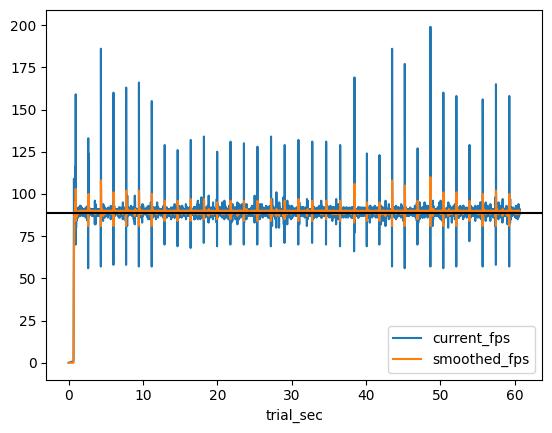

In [25]:
fig, ax = plt.subplots(1,1)
fps.plot(x='trial_sec',y='current_fps', ax=ax)
fps.plot(x='trial_sec',y='smoothed_fps', ax=ax)
ax.axhline(y=sample_rate, c='black')